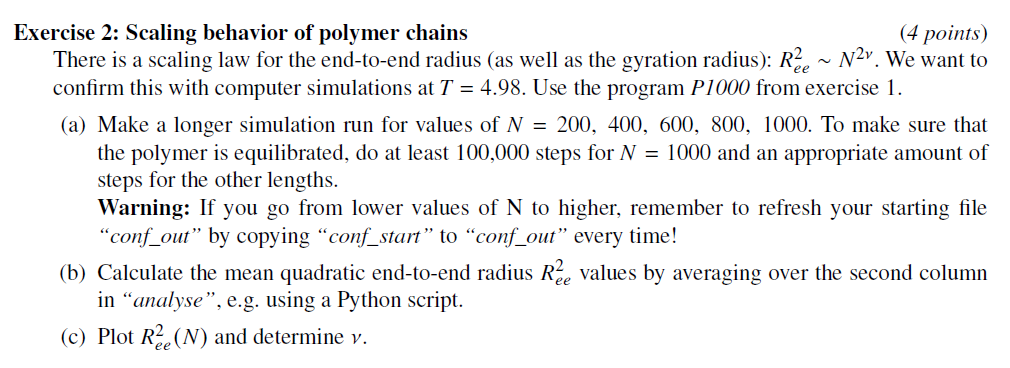

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

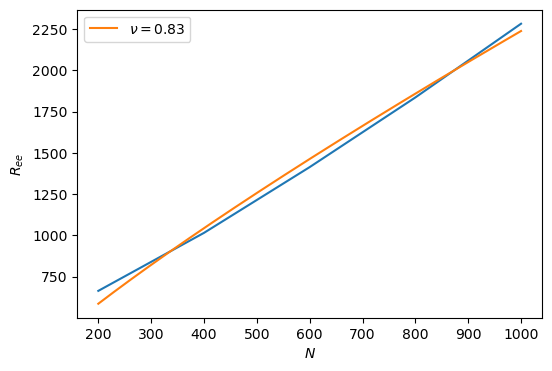

In [8]:
Ns = np.array([200,400,600,800,1000])
R2s = np.zeros((len(Ns)))

for i,N in enumerate(Ns):
    data = np.loadtxt("Exercise2/analyse" + str(N))
    R2 = np.mean(data[:,1])
    R2s[i] = R2

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(Ns, R2s)


x_fit, y_fit = Ns, R2s
func = lambda x, pw, m : m*np.power(x, pw)
p0 = (1,1)
coeff, var_matrix = opt.curve_fit(func, x_fit, y_fit, p0 = p0)
ν = coeff[0]
func_ = lambda x : func(x, *coeff)


N_highres = np.linspace(min(Ns),max(Ns), 1000)
ax.plot(N_highres, func_(N_highres), label=f"$ν = {ν:.2f}$")
ax.set_xlabel("$N$")
ax.set_ylabel("$R_{ee}$")
ax.legend()